# Linear Regression and modelling

### Approach
1. Import libraries
2. import Dataframes from CSV
3. Basic MLR on all features without transformation
4. Run Ridge and lasso on train dataframe and compare using R2 score and RSME score to see which model perform better
5. A.(Adopt Ridge) Due to better results
5. B.Based on the results evulate top 25 features
6. Run evaluation on top 25 features using Ridge
7. Run Evaluation on All features(133 features) using Ridge (** Highest Score obtained)
8. Use step 6. top 25 features-> apply polynomial features power 2
9. Run All 350 polynomial features on Ridge
10. Run top 25 features using Ridge
11. Find Best score via Kaggle upload

### Things to improve on, 
1. use grid search
2. use RFE sklearn 

## Import Libraries

In [235]:
#import all relevant libs
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import random
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import os
from IPython.display import display
import fnmatch

#sklibrary
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import csv

In [236]:
df_train = pd.read_csv('df_train.csv')
df_test  = pd.read_csv('df_test.csv')

In [237]:
df_train.head()

,Id,Gr Liv Area,Total Bsmt SF,Garage Area,Garage Cars,Total Bath,age_property,TotRms AbvGrd,Mas Vnr Area,Fireplaces,...,House Style_2.5Unf,Neighborhood_Greens,Roof Matl_WdShake,Sale Type_CWD,Neighborhood_NridgHt,Neighborhood_Gilbert,Neighborhood_Sawyer,Neighborhood_NAmes,Sale Type_ConLw,Garage Type_BuiltIn
0,109,1479,725.0,475.0,2.0,3.0,14,6,289.0,0,...,0,0,0,0,0,0,1,0,0,0
1,544,2122,913.0,559.0,2.0,4.0,22,8,132.0,1,...,0,0,0,0,0,0,0,0,0,0
2,153,1057,1057.0,246.0,1.0,2.0,12,5,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,318,1444,384.0,400.0,2.0,3.0,12,7,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,255,1445,676.0,484.0,2.0,2.0,26,6,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
df_test.head()

,Id,Gr Liv Area,Total Bsmt SF,Garage Area,Garage Cars,Total Bath,age_property,TotRms AbvGrd,Mas Vnr Area,Fireplaces,...,House Style_2.5Unf,Neighborhood_Greens,Roof Matl_WdShake,Sale Type_CWD,Neighborhood_NridgHt,Neighborhood_Gilbert,Neighborhood_Sawyer,Neighborhood_NAmes,Sale Type_ConLw,Garage Type_BuiltIn
0,2658,1928,1020.0,440.0,1.0,2.0,69,9,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2718,1967,1967.0,580.0,2.0,2.0,42,10,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2,2414,1496,654.0,426.0,2.0,4.0,13,7,0.0,1,...,0,0,0,0,0,1,0,0,0,0
3,1989,968,968.0,480.0,2.0,1.0,13,5,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,625,1394,1394.0,514.0,2.0,3.0,56,6,247.0,2,...,0,0,0,0,0,0,0,1,0,0


In [239]:
df_test.shape

(879, 134)

### Features to model

In [240]:
features = df_train.columns.tolist()
features.remove('SalePrice')
features.remove('Id')
len(features)

133

Attempt using MLR without any transformation

In [241]:
lr = LinearRegression()

In [242]:
X = df_train[features]
y = df_train['SalePrice']

In [243]:
model = lr.fit(X,y)

In [244]:
predictions = model.predict(X)
score = model.score(X,y)
print(score)

0.9016066498501701


## Model Prep: Train/test split
### Decide on Ridge or lasso regression
##### On a smaller note this model has the best RMSE among all models.(Please refer to the bottom part on more inferential visualization)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1636, 133), (409, 133), (1636,), (409,))

In [246]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
lasso_search = LassoCV(alphas = np.arange(0.001, 1.0, 0.001))
lasso_search.fit(X_train_ss,y_train)
lasso = Lasso(alpha= lasso_search.alpha_)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [248]:
ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)

ridge = Ridge(alpha= ridge_search.alpha_)

In [249]:
# combine types of regression
def regression(reg_list,X_train_ss, X_test_ss, y_train, y_test,features):
    coeff=[]
    for reg in reg_list:
        print(X_train_ss.shape, X_test_ss.shape, y_train.shape, y_test.shape)
        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        
        pred = reg.predict(X_test_ss)
        r2score = r2_score(y_test, pred)
        rmse= np.sqrt(mean_squared_error(y_test, pred))
        print(reg)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
        print('R2 score:', r2score)
        print('test RMSE:', rmse)
        print(' ')
        pd.Series(reg.coef_,index =features ).plot.bar(figsize=(15,7))
        plt.show()
        print(' ')
        reg_coeff =dict(zip(features,(reg.coef_)))
        coeff.append(reg_coeff)
    return coeff   

(1636, 133) (409, 133) (1636,) (409,)
Ridge(alpha=136.67163564620074, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)
Ridge score: [0.80851562 0.83180135 0.83246116 0.92488958 0.87948733 0.83938182
 0.90890331 0.88211048 0.83937972 0.90007616]
Ridge mean score: 0.864700654215268
R2 score: 0.8568442508273851
test RMSE: 27186.69916551802
 


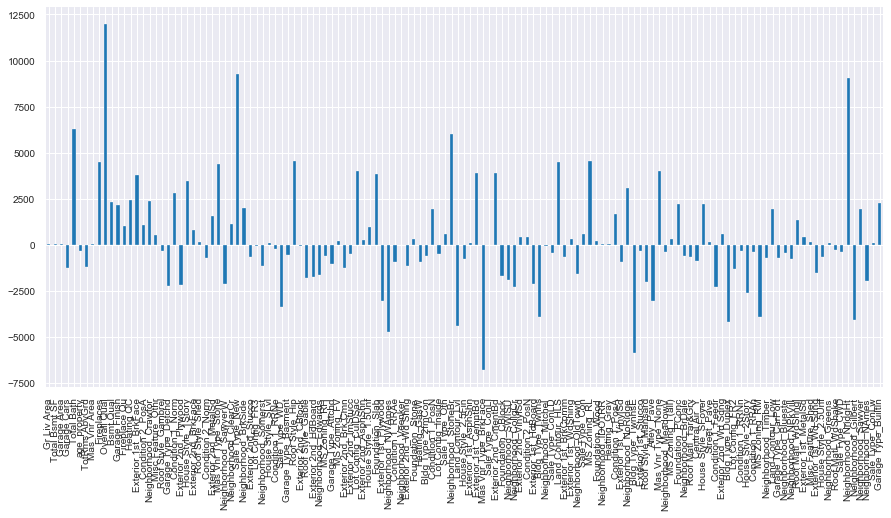

 
(1636, 133) (409, 133) (1636,) (409,)
Lasso(alpha=0.999, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Lasso score: [0.80161145 0.799559   0.85311251 0.93203846 0.88849271 0.84440478
 0.90894972 0.88219811 0.86445438 0.91263019]
Lasso mean score: 0.868745132170121
R2 score: 0.867748136079648
test RMSE: 26130.816807089966
 


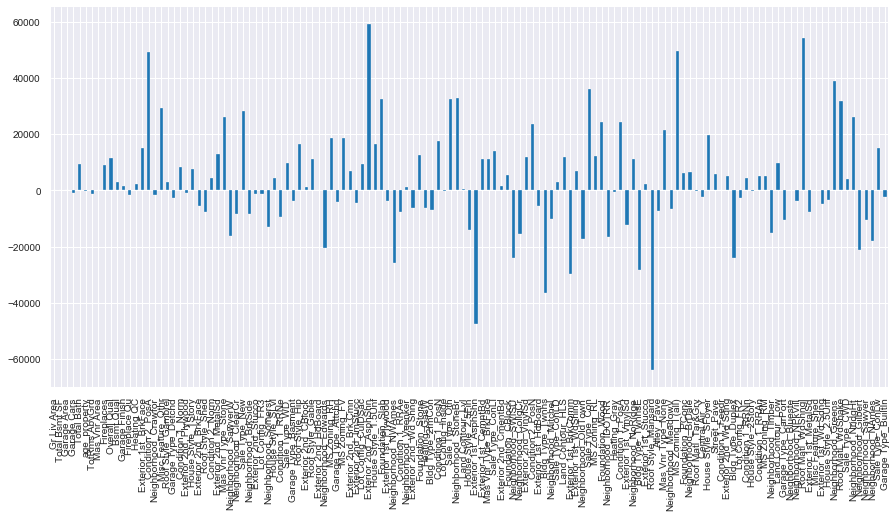

In [250]:
reg_list = [ridge,lasso]
coeff = regression(reg_list,X_train, X_test, y_train, y_test,features)

## Ridge regression seems to be performing better

In [251]:
ridge_coeff = coeff[0]
lasso_coeff = coeff[1]

In [252]:
ridge_coeff_df = pd.DataFrame(list(ridge_coeff.items()),columns=['Features','Coefficient'])


In [253]:
#obtaining the top 25 features
ridge_coeff_df['abs coeff']= abs(ridge_coeff_df['Coefficient'])

In [254]:
features_model_2 =ridge_coeff_df.sort_values('abs coeff', ascending = False).head(25)['Features'].tolist()

print(features_model_2)
X = df_train[features_model_2]
y = df_train['SalePrice']

['Overall Qual', 'Sale Type_New', 'Neighborhood_NridgHt', 'Mas Vnr Type_BrkFace', 'Total Bath', 'Neighborhood_StoneBr', 'Bldg Type_TwnhsE', 'Neighborhood_NWAmes', 'Roof Style_Hip', 'MS Zoning_RL', 'Land Contour_HLS', 'Fireplaces', 'Land Contour_Lvl', 'Mas Vnr Type_Stone', 'Bldg Type_Duplex', 'Neighborhood_Gilbert', 'Lot Config_CulDSac', 'Mas Vnr Type_None', 'Bldg Type_Twnhs', 'MS Zoning_RM', 'Exterior 1st_CemntBd', 'Exterior 2nd_CmentBd', 'Foundation_Slab', 'Exterior 1st_BrkFace', 'House Style_1Story']


In [255]:
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

lasso_search = LassoCV(alphas = np.arange(0.001, 1.0, 0.001))
lasso_search.fit(X_train_ss,y_train)
lasso = Lasso(alpha= lasso_search.alpha_)

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)

ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge,lasso]


(1636, 25) (409, 25) (1636,) (409,)


/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


(1636, 25) (409, 25) (1636,) (409,)
Ridge(alpha=2.8330961018393244, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)
Ridge score: [0.75103281 0.75964613 0.78410328 0.86172128 0.80793635 0.74159892
 0.85366449 0.80468758 0.78945087 0.84369692]
Ridge mean score: 0.7997538638801001
R2 score: 0.7982012780397114
test RMSE: 32278.34730873544
 


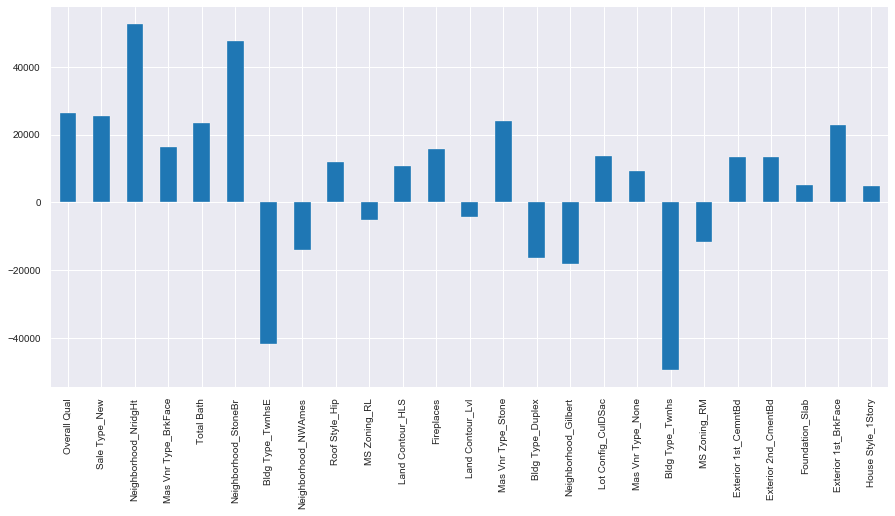

 
(1636, 25) (409, 25) (1636,) (409,)
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Lasso score: [0.75075136 0.75893443 0.78272558 0.86028979 0.80796172 0.74303035
 0.85284134 0.80451854 0.7924218  0.84567323]
Lasso mean score: 0.7999148138593732
R2 score: 0.7992055865983851
test RMSE: 32197.9259501485
 


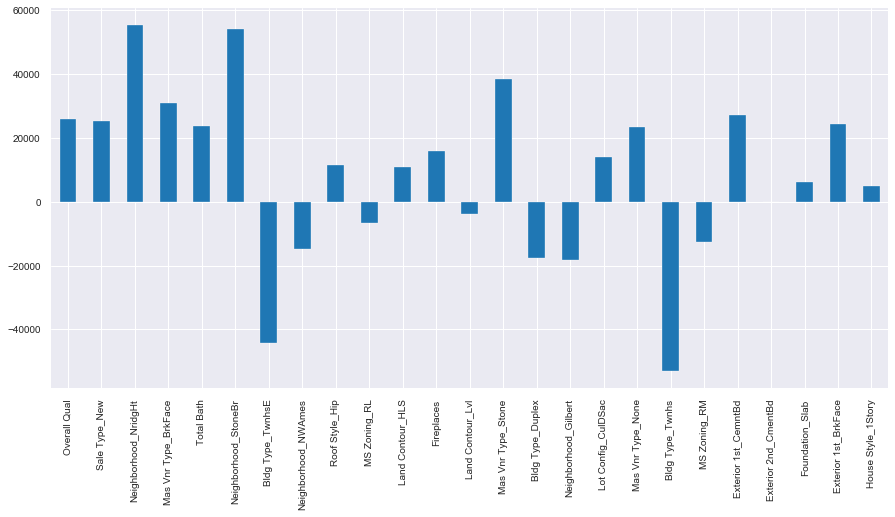

In [256]:
coeff_model_2 = regression(reg_list,X_train, X_test, y_train, y_test,features_model_2)

(1636, 25) (409, 25) (1636,) (409,)
Ridge score: [0.75048434 0.75901429 0.78276632 0.86053407 0.80837378 0.74242966
 0.85299818 0.80439577 0.79233234 0.84566211]
Ridge mean score: 0.7998990854169014
 


/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


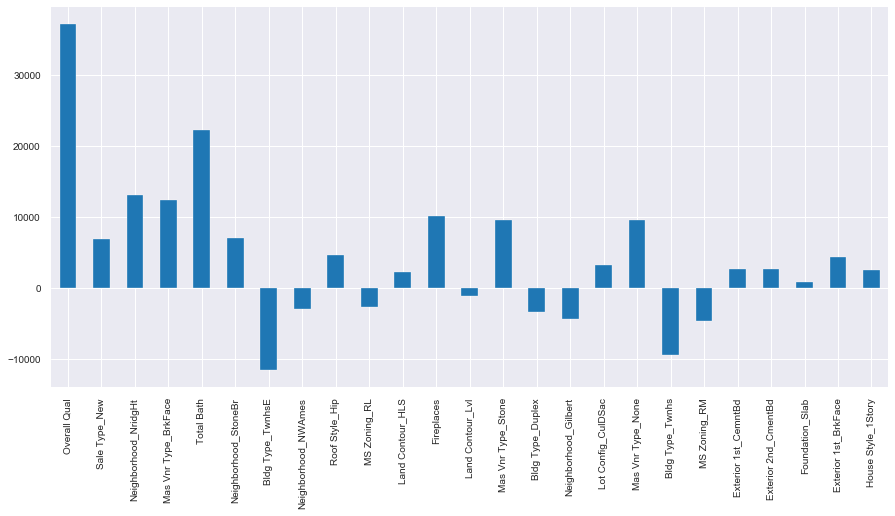

In [257]:
# use ridge model to do initial kaggle submission
#obtaining the top 25 features

X = df_train[features_model_2]
y = df_train['SalePrice']

coeff=[]
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test[features_model_2])

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        
        pred = reg.predict(X_test_ss)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
        print(' ')
        pd.Series(reg.coef_,index =features_model_2 ).plot.bar(figsize=(15,7))
        plt.show()
        print(' ')
        reg_coeff =dict(zip(features,abs(reg.coef_)))
        coeff.append(reg_coeff)

In [258]:
def submission_df(predict):
    df = pd.DataFrame(df_test['Id'])
    df['SalePrice'] = predict
    df.set_index(['Id'], inplace = True)
    df.to_csv('./data/answer.csv')

In [259]:
submission_df(pred)

### Attempt with all 133 features
This produce a better result some how ><"

(1636, 133) (409, 133) (1636,) (409,)


/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataCo

Ridge score: [0.82098941 0.81205638 0.85698275 0.93517681 0.88421174 0.83812894
 0.91216565 0.88058428 0.86041007 0.91259848]
Ridge mean score: 0.8713304525493599
 


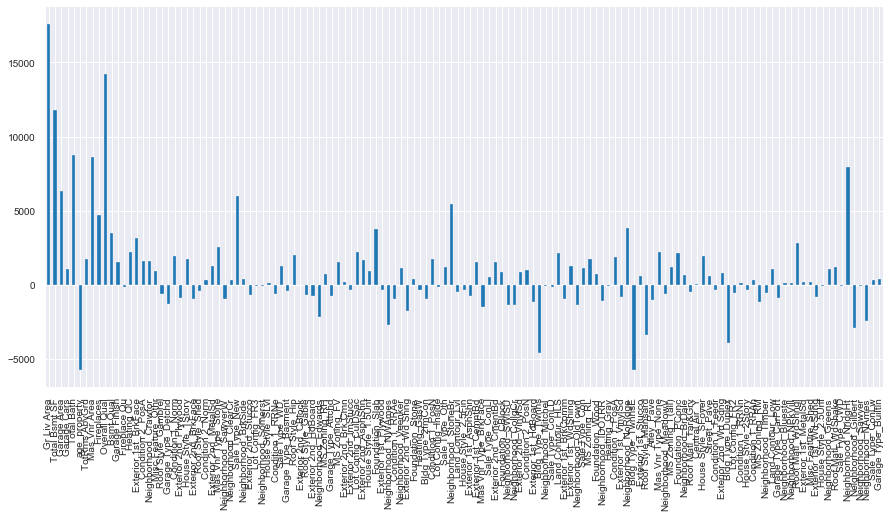

In [284]:
# use ridge model to do initial kaggle submission
#obtaining the all features

X = df_train[features]
y = df_train['SalePrice']

coeff=[]
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test[features])
X_test_train_ss = ss.transform(X_test)

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        pred = reg.predict(X_test_ss)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
        print(' ')
        pd.Series(reg.coef_,index =features ).plot.bar(figsize=(15,7))
        plt.show()
        print(' ')
        reg_coeff =dict(zip(features,abs(reg.coef_)))
        coeff.append(reg_coeff)

In [285]:
coeff[0]

{'Gr Liv Area': 17601.902145250893,
 'Total Bsmt SF': 11820.583866401055,
 'Garage Area': 6297.4672366702425,
 'Garage Cars': 1031.8344987559935,
 'Total Bath': 8724.344457473986,
 'age_property': 5728.108475582771,
 'TotRms AbvGrd': 1716.143024431149,
 'Mas Vnr Area': 8623.265841416838,
 'Fireplaces': 4713.299107493752,
 'Overall Qual': 14220.594812552317,
 'Bsmt Qual': 3502.5168762553426,
 'Garage Finish': 1511.4029774968242,
 'Fireplace Qu': 119.61704857248128,
 'Heating QC': 2220.0179532065276,
 'Exterior 1st_BrkFace': 3160.909231102044,
 'Condition 2_PosA': 1607.803378989243,
 'Neighborhood_Crawfor': 1605.4366023524879,
 'Misc Feature_Othr': 909.8061106344469,
 'Roof Style_Gambrel': 642.2199950138919,
 'Garage Type_Detchd': 1302.4836605269275,
 'Condition 1_Norm': 1941.7112763214882,
 'Exterior 2nd_Plywood': 863.4515134193076,
 'House Style_1Story': 1742.9414543225848,
 'Exterior 2nd_BrkFace': 930.3900346002492,
 'Roof Style_Shed': 392.8845852703378,
 'Condition 2_Norm': 311.06117

In [289]:
#this is for data visualation later on
ridge_coeff_df_final = pd.DataFrame(list(coeff[0].items()),columns=['Features','Coefficient'])
pred_final = ridge.predict(X_test_train_ss)
y_train_final = y_test

In [290]:
len(pred)

879

In [291]:
len(y_test)

409

In [263]:
submission_df(pred)

### Applying polynominal features to top 25
Number of features = 350

In [264]:
poly = PolynomialFeatures(include_bias=False) #degree = 2

In [265]:
X = df_train[features_model_2]
y = df_train['SalePrice']

In [266]:
X_poly      = poly.fit_transform(X)
X_test_poly = poly.fit_transform(df_test[features_model_2])

df_train_poly = pd.DataFrame(X_poly,columns = poly.get_feature_names(features_model_2))
df_test_poly = pd.DataFrame(X_test_poly,columns = poly.get_feature_names(features_model_2))
X= df_train_poly

(1636, 350) (409, 350) (1636,) (409,)
Ridge score: [0.77932174 0.80040473 0.83582938 0.87857728 0.82729564 0.73561196
 0.85417444 0.84087907 0.838366   0.86205717]
Ridge mean score: 0.8252517407985817
 


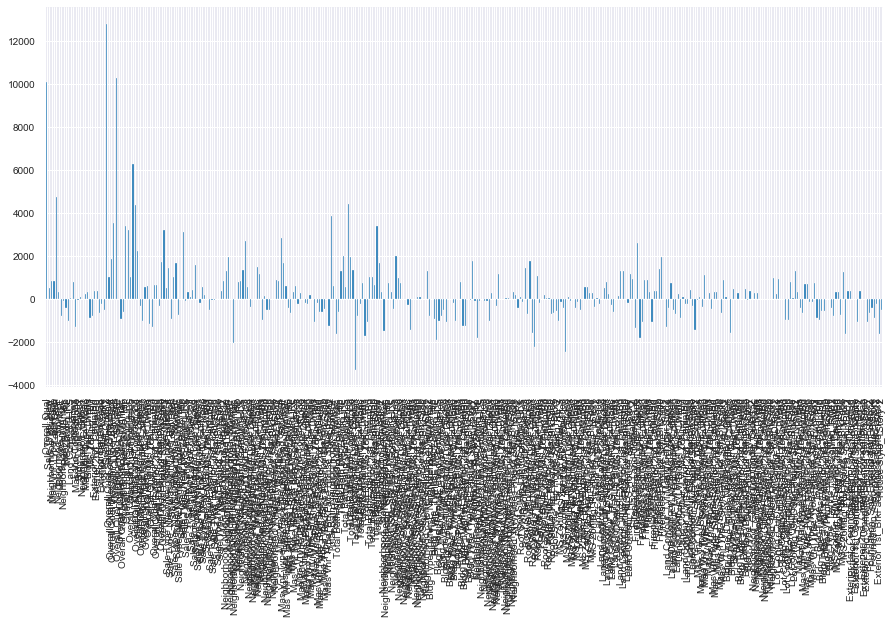

In [267]:
# use ridge model to do initial kaggle submission

#Test run model with top 25 features
coeff=[]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test_poly)

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

score = cross_val_score(ridge, X_train_ss, y_train, cv = 10)
ridge.fit(X_train_ss,y_train)

pred = ridge.predict(X_test_ss)
print('{} score: {}'.format(str(reg).split('(')[0],score))
print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
print(' ')
pd.Series(ridge.coef_,index =df_train_poly.columns ).plot.bar(figsize=(15,7))
plt.show()
print(' ')
reg_coeff =dict(zip(df_train_poly.columns.tolist(),abs(ridge.coef_)))
coeff.append(reg_coeff)

In [268]:
ridge_coeff_df_poly = pd.DataFrame(list(coeff[0].items()),columns=['Features','Coefficient'])
ridge_coeff_df_poly['Coefficient'] >0

0      True
1      True
2      True
3      True
4      True
       ... 
345    True
346    True
347    True
348    True
349    True
Name: Coefficient, Length: 350, dtype: bool

In [269]:
submission_df(pred)

In [270]:
features_model_3 =ridge_coeff_df_poly.sort_values('Coefficient', ascending = False).head(25)['Features'].tolist()
features_model_3

['Overall Qual^2',
 'Overall Qual Total Bath',
 'Overall Qual',
 'Overall Qual Fireplaces',
 'Total Bath',
 'Total Bath Fireplaces',
 'Overall Qual Land Contour_Lvl',
 'Total Bath^2',
 'Overall Qual Mas Vnr Type_BrkFace',
 'Overall Qual Roof Style_Hip',
 'Total Bath Exterior 1st_BrkFace',
 'Total Bath Bldg Type_Duplex',
 'Overall Qual House Style_1Story',
 'Overall Qual MS Zoning_RL',
 'Sale Type_New Roof Style_Hip',
 'Mas Vnr Type_BrkFace Total Bath',
 'Neighborhood_NridgHt Fireplaces',
 'Fireplaces Mas Vnr Type_Stone',
 'MS Zoning_RL Land Contour_Lvl',
 'Roof Style_Hip Neighborhood_Gilbert',
 'Overall Qual Mas Vnr Type_Stone',
 'Neighborhood_NridgHt Bldg Type_TwnhsE',
 'Neighborhood_StoneBr Fireplaces',
 'Total Bath MS Zoning_RL',
 'Total Bath Land Contour_Lvl']

### Running Top 25 polynomial features from 350 polynomial Features

(1636, 25) (409, 25) (1636,) (409,)
Ridge score: [0.7823665  0.80114236 0.81777631 0.87949028 0.81624089 0.77198061
 0.82557806 0.83597244 0.80452325 0.86091609]
Ridge mean score: 0.819598678542769
 


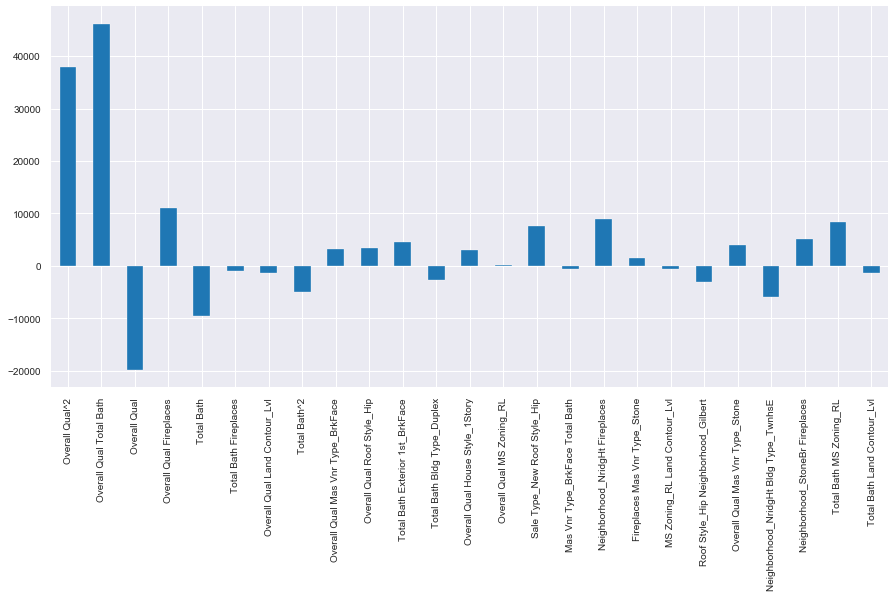

In [271]:
X = df_train_poly[features_model_3]
y = df_train['SalePrice']

coeff=[]
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test_poly[features_model_3])

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        
        pred = reg.predict(X_test_ss)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
        print(' ')
        pd.Series(reg.coef_,index =features_model_3 ).plot.bar(figsize=(15,7))
        plt.show()
        print(' ')
        reg_coeff =dict(zip(features,abs(reg.coef_)))
        coeff.append(reg_coeff)

In [272]:
submission_df(pred)

# Modelling Visulation and results

### From Kaggle submission, best RMSE value model with close results were obtain from the model consisting of 134 predictors Without polynomial features. 
1. Public : 32709
2. Private: 31534

The Following inferential Visualization will look at the features and various metrics of the model.

In [273]:
ridge_coeff_df.sort_values(by='Coefficient', inplace = True, ascending = False)
ridge_coeff_df.drop(columns ='abs coeff',inplace = True)

In [274]:
ridge_coeff_df.head(2)

,Features,Coefficient
9,Overall Qual,11993.063816
30,Sale Type_New,9259.067492


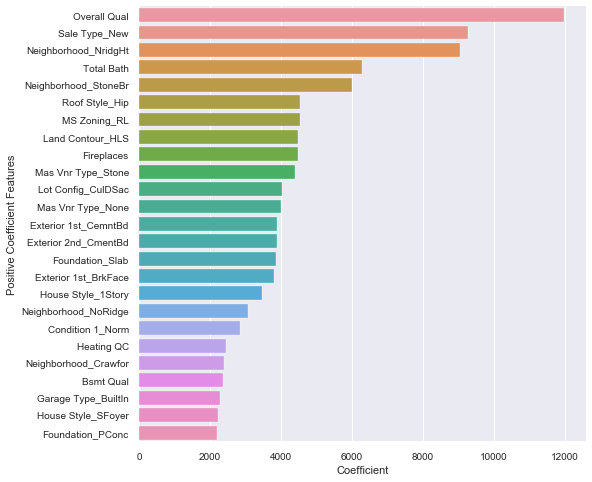

In [275]:
plt.figure(figsize=(8,8))
sns.barplot(x='Coefficient', y = 'Features', data = ridge_coeff_df[:25],ci = 'sd');
plt.ylabel('Positive Coefficient Features')
plt.show()

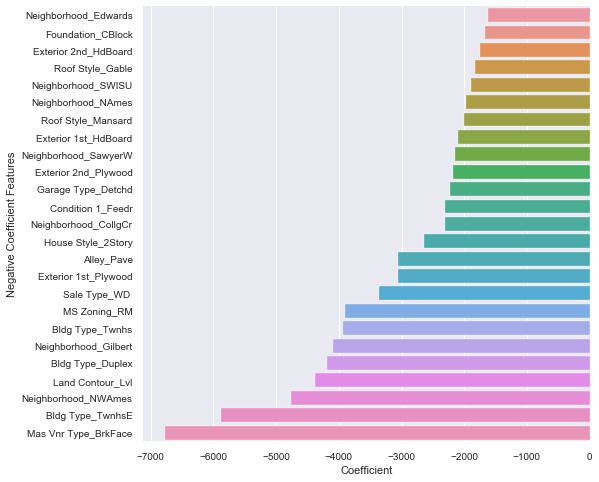

In [276]:
plt.figure(figsize=(8,8))
sns.barplot(x='Coefficient', y = 'Features', data = ridge_coeff_df[-25:],ci = 'sd');
plt.ylabel('Negative Coefficient Features')
plt.show()

In [294]:
# use ridge model to do initial kaggle submission
#obtaining the all features

X = df_train[features]
y = df_train['SalePrice']
coeff=[]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(X_test)

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        pred = reg.predict(X_test_ss)
        
        reg_coeff =dict(zip(features,abs(reg.coef_)))
        coeff.append(reg_coeff)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


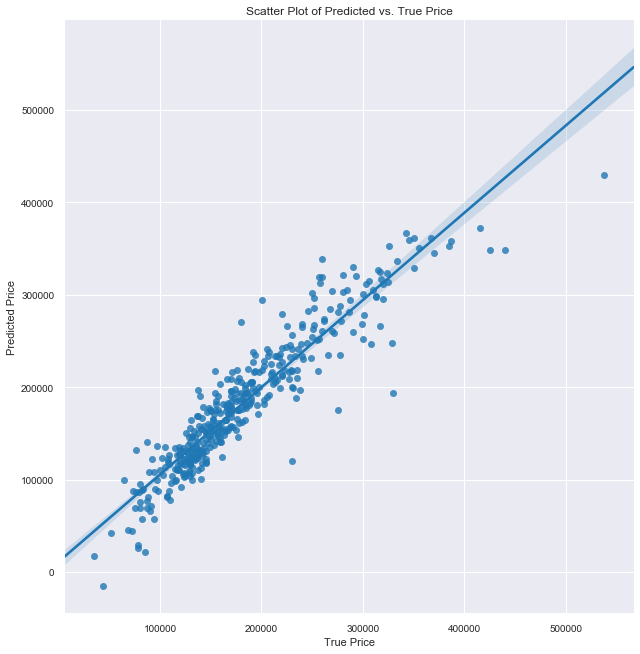

In [295]:
# Look at prediction accuracy
plot_df = pd.DataFrame()

plot_df['true'], plot_df['pred'] = y_train_final, pred
sns.lmplot(x='true', y='pred', data=plot_df, height=9)
plt.title('Scatter Plot of Predicted vs. True Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

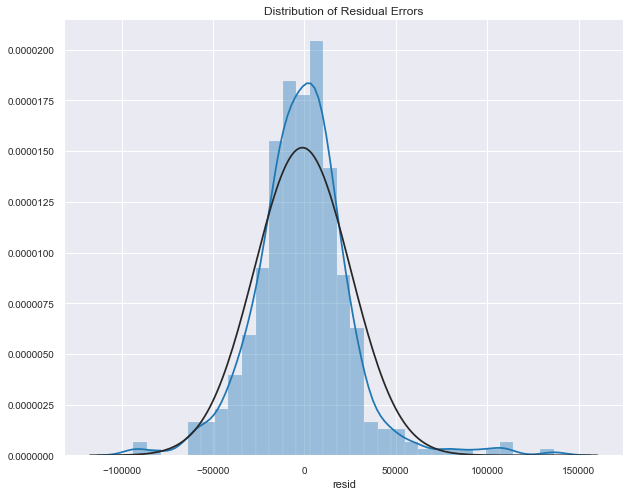

In [296]:
# Check whether the residual errors follow a normal distribution?
plot_df['resid'] = plot_df['true'] - plot_df['pred']
plt.figure(figsize=(10,8), facecolor='white')
sns.distplot(plot_df['resid'], fit=stats.norm)
plt.title('Distribution of Residual Errors')
plt.show()

##  Recommendations
---

In [297]:
ridge_coeff_df.sort_values(by='Coefficient', ascending=False).head(20)

,Features,Coefficient
9,Overall Qual,11993.063816
30,Sale Type_New,9259.067492
127,Neighborhood_NridgHt,9034.907395
4,Total Bath,6275.980407
64,Neighborhood_StoneBr,5993.889078
39,Roof Style_Hip,4531.170178
86,MS Zoning_RL,4525.870836
81,Land Contour_HLS,4483.087531
8,Fireplaces,4472.804223
27,Mas Vnr Type_Stone,4379.664379


In [298]:
ridge_coeff_df.sort_values(by='Coefficient', ascending=True).head(20)

,Features,Coefficient
69,Mas Vnr Type_BrkFace,-6780.496071
93,Bldg Type_TwnhsE,-5881.073591
54,Neighborhood_NWAmes,-4755.635035
65,Land Contour_Lvl,-4384.086891
108,Bldg Type_Duplex,-4190.717799
128,Neighborhood_Gilbert,-4089.741351
78,Bldg Type_Twnhs,-3931.396583
113,MS Zoning_RM,-3894.607260
37,Sale Type_WD,-3356.697528
53,Exterior 1st_Plywood,-3057.990762


#### Which features appear to add the most value to a home?
- The size of a home, such as above ground living area, first floor and basement area. For instance, a 1 square foot increase in above ground living area will on average increase \$11000 in value to a home. 
- Overall quality rating of the material and finish of a house - a 1 unit increase in the quality rating will increase the value to a home by around \$12000.


#### Which features hurt the value of a home the most?
- A townhouse building type will lower value by $5900
- Brick Face Masonary Veener type will lower building price by \$6780
- For a house located in North Ames, its value is expected to be lower by \$2300 in comparison to a house located in Bloomington Heights.

#### What are things that homeowners could improve in their homes to increase the value?
- Increasing the total number of bath
- Number of Fireplaces

#### What neighborhoods seem like they might be a good investment?
- Northridge Heights \$9034
- Stone Brook        \$5993
- Northridge         \$3067

#### Do you feel that this model will generalize to other cities?
- It depends on factors such as whether other cities have similar building types to Ames. I suspect the model will not work as well on cities with a high-density of high-rise apartments as many of the features in our current model are biased towards bungalows.
- Features related to Ames city, such as neighborhood, will also have to be removed.

#### How could you revise your model to make it more universal OR what factors would you need from another city to make a comparable model?
- Group related features to generalize the model even further, such as overall size of home, binary variables for facilities, or distance to points of interests such as schools, supermarkets, etc.